In [40]:
%pip install sdv pandas scikit-learn matplotlib seaborn

In [63]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer

In [64]:
# Load the Adult (Census Income) dataset
adult = fetch_openml(data_id=1590, as_frame=True)
adult_df = adult.frame
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [65]:
# Encode categorical variables
for col in adult_df.select_dtypes(include='category').columns:
    adult_df[col] = adult_df[col].astype(str)
    adult_df[col] = LabelEncoder().fit_transform(adult_df[col])

In [66]:
# Split original data into features and target
X = adult_df.drop(columns=['class'])
y = adult_df['class']
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [67]:
# Standardize the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995129,-0.242933,0.351675,-2.397350,-1.197259,0.916138,-0.101718,0.971649,-1.971746,0.70422,-0.144804,-0.217127,-0.034087,0.24987
1,-0.046942,-0.242933,-0.945524,0.183660,-0.419335,-0.410397,-0.563673,-0.900852,0.392384,0.70422,-0.144804,-0.217127,0.772930,0.24987
2,-0.776316,-1.500985,1.394723,-0.848744,0.747550,-0.410397,0.822192,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.24987
3,0.390683,-0.242933,-0.277844,1.216063,-0.030373,-0.410397,-0.101718,-0.900852,-1.971746,0.70422,0.886874,-0.217127,-0.034087,0.24987
4,-1.505691,2.902198,-0.815954,1.216063,-0.030373,0.916138,1.746102,0.971649,0.392384,-1.42001,-0.144804,-0.217127,-0.841104,0.24987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,-0.242933,0.640492,-0.848744,0.747550,-0.410397,1.284147,2.219984,0.392384,-1.42001,-0.144804,-0.217127,-0.195490,0.24987
48838,0.098933,-0.242933,-0.334178,0.183660,-0.419335,-0.410397,-0.101718,-0.900852,0.392384,0.70422,-0.144804,-0.217127,-0.034087,0.24987
48839,1.411808,-0.242933,-0.357510,0.183660,-0.419335,2.242673,-1.487583,1.595817,0.392384,-1.42001,-0.144804,-0.217127,-0.034087,0.24987
48840,-1.213941,-0.242933,0.111984,0.183660,-0.419335,0.916138,-1.487583,0.971649,0.392384,0.70422,-0.144804,-0.217127,-1.648120,0.24987


In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression on Original Data
log_reg_original = LogisticRegression(max_iter=200)
log_reg_original.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [69]:
# Predict and evaluate on the original test data
y_pred_original = log_reg_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

In [70]:
print("Accuracy on Original Data: {:.2f}%".format(accuracy_original * 100))
print("\nConfusion Matrix (Original Data):\n", confusion_matrix(y_test, y_pred_original))
print("\nClassification Report (Original Data):\n", classification_report(y_test, y_pred_original))

Accuracy on Original Data: 82.88%

Confusion Matrix (Original Data):
 [[7061  418]
 [1254 1036]]

Classification Report (Original Data):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [71]:
# Generate synthetic data using SDV
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=adult_df)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "age": {
            "sdtype": "numerical"
        },
        "workclass": {
            "sdtype": "categorical"
        },
        "fnlwgt": {
            "sdtype": "numerical"
        },
        "education": {
            "sdtype": "numerical"
        },
        "education-num": {
            "sdtype": "numerical"
        },
        "marital-status": {
            "sdtype": "categorical"
        },
        "occupation": {
            "sdtype": "numerical"
        },
        "relationship": {
            "sdtype": "categorical"
        },
        "race": {
            "sdtype": "categorical"
        },
        "sex": {
            "sdtype": "categorical"
        },
        "capital-gain": {
            "sdtype": "numerical"
        },
        "capital-loss": {
            "sdtype": "numerical"
        },
        "hours-per-week": {
            "sdtype": "numerical"
        },
        "native-country": {
       

In [72]:
# Initialize SDV synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Fit the synthesizer on the Adult dataset
synthesizer.fit(adult_df)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



In [73]:
# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(adult_df))
synthetic_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,43,3,198834,14,10,0,12,0,4,1,95955,4133,52,38,0
1,50,3,446968,15,7,2,11,1,4,1,3639,368,41,40,0
2,27,8,174306,2,9,4,12,1,4,1,1,109,26,40,0
3,29,3,139472,9,9,2,4,5,4,1,79875,1243,35,32,0
4,21,0,43547,15,11,4,7,3,4,1,61406,152,26,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,44,3,129830,3,10,4,6,1,4,1,227,109,43,29,0
48838,30,3,97990,15,8,6,13,3,4,1,0,3490,74,41,0
48839,29,3,144191,15,9,2,6,4,4,1,43524,3955,20,34,1
48840,51,5,107693,4,9,2,11,1,4,1,50996,2439,47,37,0


In [74]:
# Split synthetic data into features and labels
X_synthetic = synthetic_data.drop(columns=['class'])
y_synthetic = synthetic_data['class']
synthetic_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,43,3,198834,14,10,0,12,0,4,1,95955,4133,52,38,0
1,50,3,446968,15,7,2,11,1,4,1,3639,368,41,40,0
2,27,8,174306,2,9,4,12,1,4,1,1,109,26,40,0
3,29,3,139472,9,9,2,4,5,4,1,79875,1243,35,32,0
4,21,0,43547,15,11,4,7,3,4,1,61406,152,26,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,44,3,129830,3,10,4,6,1,4,1,227,109,43,29,0
48838,30,3,97990,15,8,6,13,3,4,1,0,3490,74,41,0
48839,29,3,144191,15,9,2,6,4,4,1,43524,3955,20,34,1
48840,51,5,107693,4,9,2,11,1,4,1,50996,2439,47,37,0


In [75]:
# Standardize the synthetic data
X_synthetic = pd.DataFrame(scaler.transform(X_synthetic), columns=X_synthetic.columns)

# Train Logistic Regression on Synthetic Data
log_reg_synthetic = LogisticRegression(max_iter=200)
log_reg_synthetic.fit(X_synthetic, y_synthetic)


LogisticRegression(max_iter=200)

In [76]:
# Predict and evaluate on the original test data using the model trained on synthetic data
y_pred_synthetic = log_reg_synthetic.predict(X_test)
accuracy_synthetic = accuracy_score(y_test, y_pred_synthetic)


In [77]:
print("\nAccuracy on Synthetic Data: {:.2f}%".format(accuracy_synthetic * 100))
print("\nConfusion Matrix (Synthetic Data):\n", confusion_matrix(y_test, y_pred_synthetic))
print("\nClassification Report (Synthetic Data):\n", classification_report(y_test, y_pred_synthetic))



Accuracy on Synthetic Data: 76.82%

Confusion Matrix (Synthetic Data):
 [[7478    1]
 [2263   27]]

Classification Report (Synthetic Data):
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      7479
           1       0.96      0.01      0.02      2290

    accuracy                           0.77      9769
   macro avg       0.87      0.51      0.45      9769
weighted avg       0.81      0.77      0.67      9769



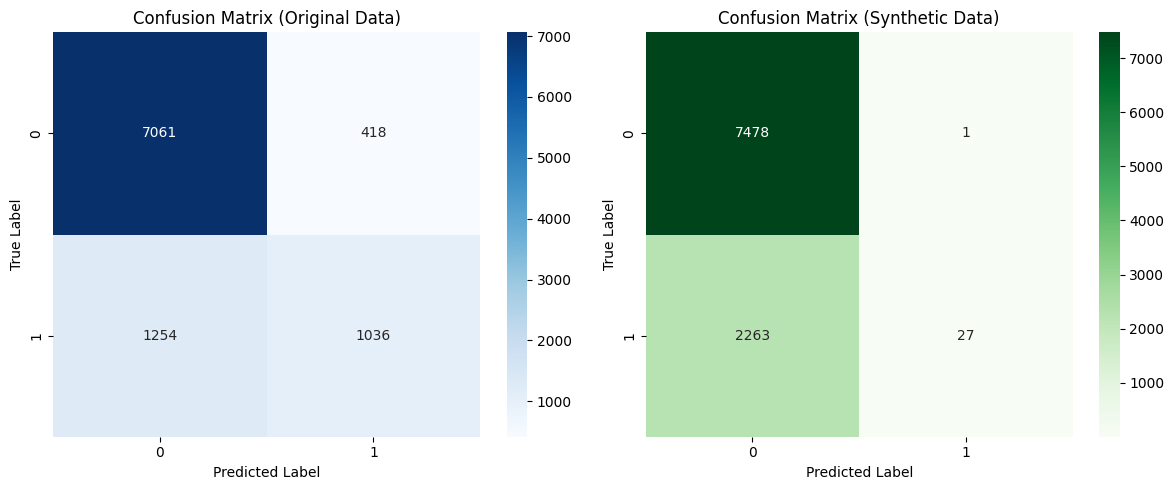

In [78]:
# Plot Comparison Graphs

# Confusion matrix heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_synthetic = confusion_matrix(y_test, y_pred_synthetic)

sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Original Data)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_synthetic, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix (Synthetic Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

<ipython-input-79-8ce0b9112707>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




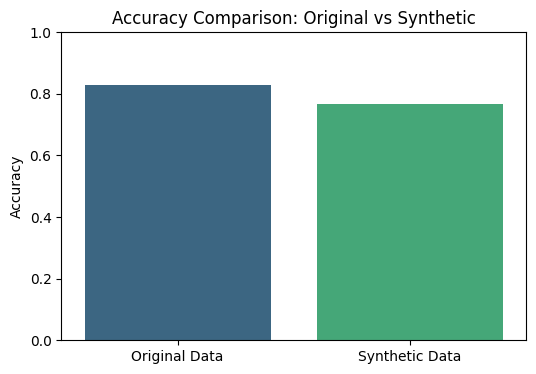

In [79]:
# Bar plot for accuracy comparison
accuracy_scores = [accuracy_original, accuracy_synthetic]
labels = ['Original Data', 'Synthetic Data']

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison: Original vs Synthetic')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1
plt.show()


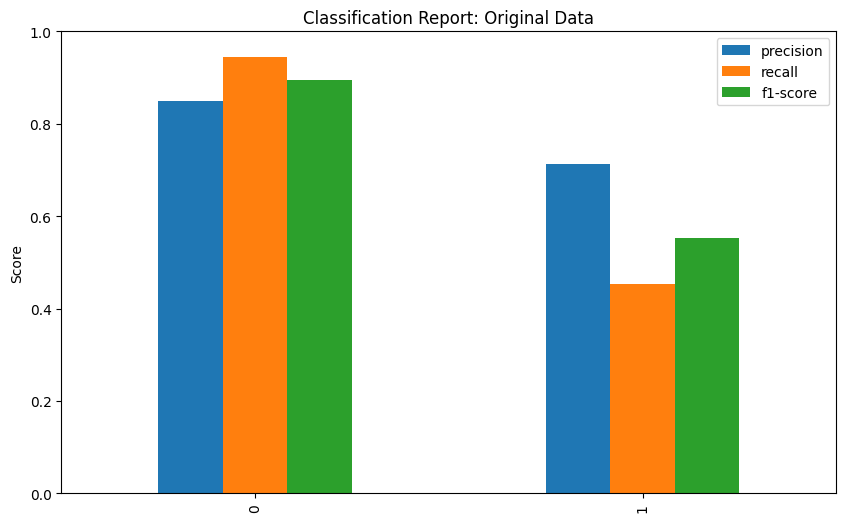

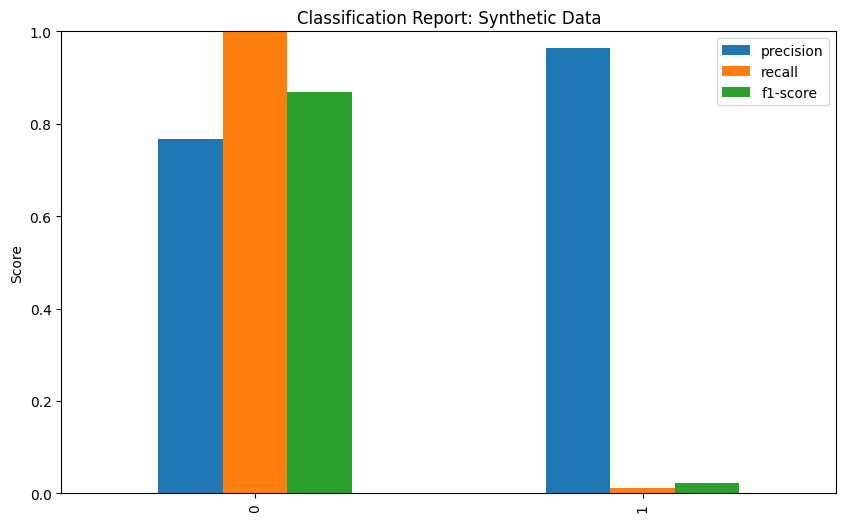

In [80]:
# Plotting classification reports
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :]  # Exclude support/accuracy info

    df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
    plt.title(title)
    plt.ylabel('Score')
    plt.show()

# Plot classification report for original and synthetic data
plot_classification_report(y_test, y_pred_original, 'Classification Report: Original Data')
plot_classification_report(y_test, y_pred_synthetic, 'Classification Report: Synthetic Data')


In [81]:
# @title Load the Banknote dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_df = pd.read_csv(url, header=None, names=columns)
banknote_df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [82]:
# @title Split original data into training and testing sets
X = banknote_df.drop(columns=['class'])
y = banknote_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# @title Train Logistic Regression on Original Data
log_reg_original = LogisticRegression(max_iter=200)
log_reg_original.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [84]:
# Predict and evaluate on the original test data
y_pred_original = log_reg_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)


In [85]:
print("Accuracy on Original Data: {:.2f}%".format(accuracy_original * 100))
print("\nConfusion Matrix (Original Data):\n", confusion_matrix(y_test, y_pred_original))
print("\nClassification Report (Original Data):\n", classification_report(y_test, y_pred_original))


Accuracy on Original Data: 98.55%

Confusion Matrix (Original Data):
 [[146   2]
 [  2 125]]

Classification Report (Original Data):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [87]:
# @title Generate synthetic data using SDV
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=banknote_df)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "variance": {
            "sdtype": "numerical"
        },
        "skewness": {
            "sdtype": "numerical"
        },
        "curtosis": {
            "sdtype": "numerical"
        },
        "entropy": {
            "sdtype": "numerical"
        },
        "class": {
            "sdtype": "categorical"
        }
    }
}

In [90]:
# Initialize SDV synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Fit the synthesizer on original Banknote dataset
synthesizer.fit(banknote_df)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=banknote_df.shape[0])
synthetic_data

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.



,variance,skewness,curtosis,entropy,class
0,2.877346,6.417843,-1.547089,-1.151037,0
1,0.627851,-3.454747,2.686150,-0.291496,1
2,4.935479,2.862898,4.269479,1.014806,0
3,-2.401772,2.148556,1.308452,-1.613217,1
4,-0.220852,-5.298891,-2.766330,0.278655,1
...,...,...,...,...,...
1367,-3.085808,-10.443998,1.295584,0.102046,1
1368,-3.140864,10.502407,-2.294448,-6.620753,0
1369,0.536541,2.185419,1.446249,0.345557,0
1370,5.641496,10.404890,-4.186489,-4.495152,0


In [93]:
# @title Split synthetic data into features and labels
X_synthetic = synthetic_data.drop(columns=['class'])
y_synthetic = synthetic_data['class']

In [94]:
# Train Logistic Regression on Synthetic Data
log_reg_synthetic = LogisticRegression(max_iter=200)
log_reg_synthetic.fit(X_synthetic, y_synthetic)

# Predict and evaluate on the original test data using the model trained on synthetic data
y_pred_synthetic = log_reg_synthetic.predict(X_test)
accuracy_synthetic = accuracy_score(y_test, y_pred_synthetic)


In [95]:
print("\nAccuracy on Synthetic Data: {:.2f}%".format(accuracy_synthetic * 100))
print("\nConfusion Matrix (Synthetic Data):\n", confusion_matrix(y_test, y_pred_synthetic))
print("\nClassification Report (Synthetic Data):\n", classification_report(y_test, y_pred_synthetic))



Accuracy on Synthetic Data: 98.55%

Confusion Matrix (Synthetic Data):
 [[144   4]
 [  0 127]]

Classification Report (Synthetic Data):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       148
           1       0.97      1.00      0.98       127

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



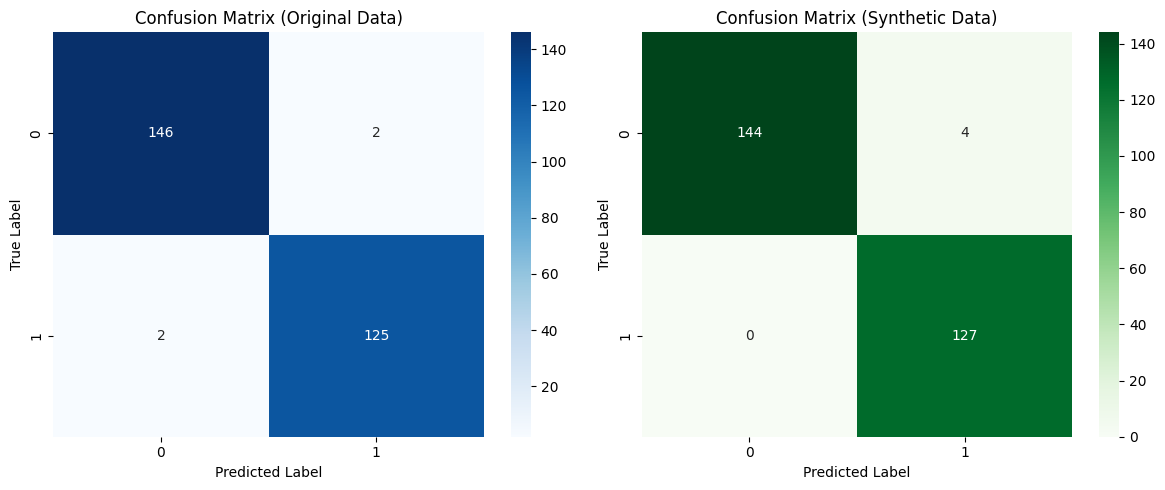

In [96]:
# Confusion matrix heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_synthetic = confusion_matrix(y_test, y_pred_synthetic)

sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Original Data)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_synthetic, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix (Synthetic Data)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


<ipython-input-97-8ce0b9112707>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




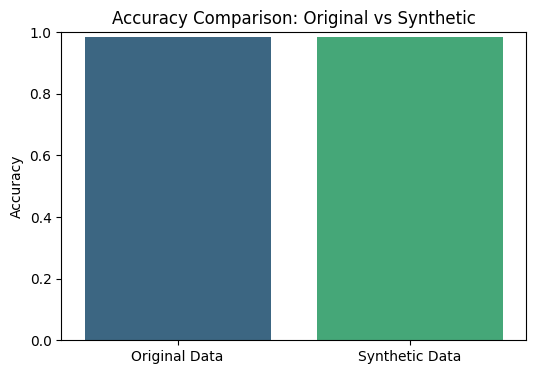

In [97]:
# Bar plot for accuracy comparison
accuracy_scores = [accuracy_original, accuracy_synthetic]
labels = ['Original Data', 'Synthetic Data']

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison: Original vs Synthetic')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1
plt.show()

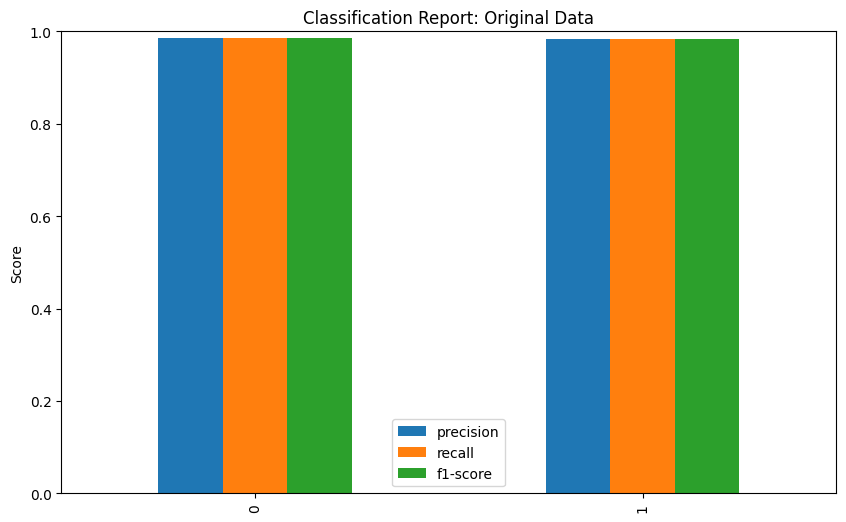

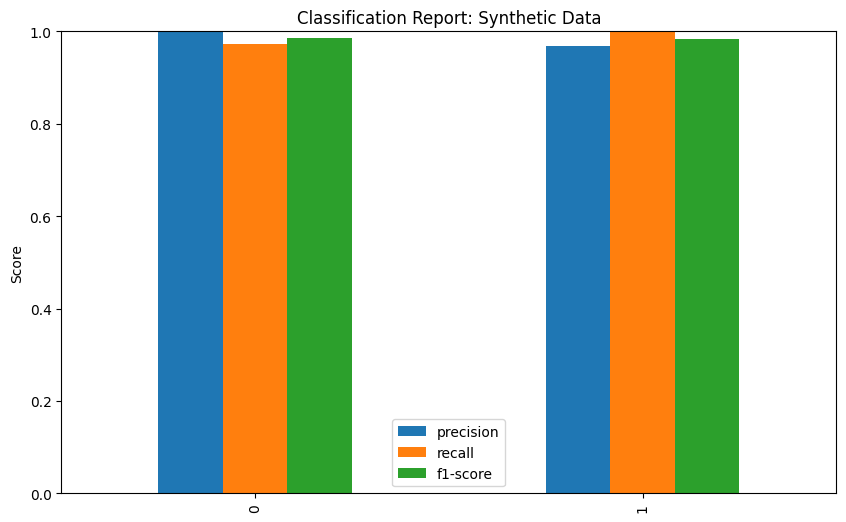

In [98]:

# Plotting classification reports
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.iloc[:-3, :]  # Exclude support/accuracy info

    df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
    plt.title(title)
    plt.ylabel('Score')
    plt.show()

# Plot classification report for original and synthetic data
plot_classification_report(y_test, y_pred_original, 'Classification Report: Original Data')
plot_classification_report(y_test, y_pred_synthetic, 'Classification Report: Synthetic Data')